# Clase 8 - Forward Propagation

## Ejercicio 1

Igorando el sesgo/bias y asumiendo activación sigmoidal implementar [la siguiente red neuronal](https://gadictos.com/neural-network-pt1/) en NumPy


<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [2]:
import numpy as np

# Se declara la función de activación
def sigmoid(X):
  return 1/(1+np.exp(-X))

# Pesos de la capa 1 (3x3)
Wc1 = np.array([[0.9,0.8,0.1],
                [0.3,0.5,0.6],
                [0.2,0.4,0.7]])

# Pesos de la capa 2 (3x1)
Wc2 = np.array([[0.3,0.5,0.9]]).T

# Valores de entrada (4 observaciones, 3 variables)
X = np.array([[1,0,1],
              [1,2,3],
              [4,5,6],
              [6,7,8]])

# Forward propagation (Capa 1)
# Dimensiones H1: (4x3)(3x3) = (4x3)
H1 = np.matmul(X, Wc1)
A1 = sigmoid(H1)

# Forward propagation (Capa 2)
# Dimensiones H2: (4x3)(3x1) = (4x1)
H2 = np.matmul(A1, Wc2)
y_hat = sigmoid(H2)

print(f"Salida de red neuronal: \n{y_hat}")

Salida de red neuronal: 
[[0.77387413]
 [0.83403412]
 [0.84538425]
 [0.84552612]]


### Versión Simplificada de los Cálculos

In [2]:
def ForwardProp(X):

    # Pesos de la capa 1 (3x3)
    Wc1 = np.array([[0.9,0.8,0.1],
                    [0.3,0.5,0.6],
                    [0.2,0.4,0.7]])

    # Pesos de la capa 2 (3x1)
    Wc2 = np.array([[0.3,0.5,0.9]]).T

    # Cálculos de forward propagation
    A1 = sigmoid(np.matmul(X, Wc1))
    A2 = sigmoid(np.matmul(A1, Wc2))
    return A2

print(f"Salida de red neuronal: \n{ForwardProp(X)}")

Salida de red neuronal: 
[[0.77387413]
 [0.83403412]
 [0.84538425]
 [0.84552612]]


### Orientado a Objetos

In [3]:
class RedNeuronal:

  # Rutina de inicialización
  def __init__(self):

    # Pesos de la capa 1 (3x3)
    self.Wc1 = np.array([[0.9,0.8,0.1],
                         [0.3,0.5,0.6],
                         [0.2,0.4,0.7]])

    # Pesos de la capa 2 (3x1)
    self.Wc2 = np.array([[0.3,0.5,0.9]]).T

  # Rutina para hacer forward propagation
  def forward_propagation(self, X):

    A1 = sigmoid(np.matmul( X,self.Wc1))
    A2 = sigmoid(np.matmul(A1,self.Wc2))
    return A2

nn = RedNeuronal()
print(f"Salida de red neuronal: \n{nn.forward_propagation(X)}")

Salida de red neuronal: 
[[0.77387413]
 [0.83403412]
 [0.84538425]
 [0.84552612]]


## Ejercicio 2

Utilizar Numpy para definir una función que calcule la salida del siguiente modelo. Dado que cada "sub-modelo" (neurona intermedia) detecta una característica intermedia "h" determinar para cada entrada la característica intermedia con mayor presencia.

![nn1](Imagenes/NN2.png)

In [4]:
def ForwardProp(X):

    # Se le agrega una columna de "1s" a X (Nx3)
    X = np.hstack((X, np.ones((X.shape[0], 1))))

    # Pesos de la capa 1 (3x2)
    Wc1 = np.array([[ 5, -2, -8],
                    [ 7, -3,  1]]).T

    # Pesos de la capa 2 (3x1)
    Wc2 = np.array([[ 7, 5, -6]]).T

    # Cálculos de forward propagation
    # Dims A1: (Nx3)(3x2) = (Nx2)
    A1 = sigmoid(np.matmul(X, Wc1))

    # Activaciones intermedias
    print(f"Activaciones Intermedias: \n{np.mean(A1, axis=0)}")

    # Se agrega una columna de "1s" a A1 (Nx2) -> (Nx3)
    A1 = np.hstack((A1, np.ones((A1.shape[0], 1))))

    # Dims A2: (Nx3)(3x1) = (Nx1)
    A2 = sigmoid(np.matmul(A1, Wc2))
    
    return A2

# Se declara el vector de entrada
X = np.array([[1,0],
              [1,2],
              [4,5],
              [6,7],
              [4,2]])

print(f"Salida de red neuronal: \n{ForwardProp(X)}")

Activaciones Intermedias: 
[0.58569266 0.97609218]
Salida de red neuronal: 
[[0.338565  ]
 [0.16943494]
 [0.99432264]
 [0.99752158]
 [0.99752158]]


Parece que para todas las entradas dadas al algoritmo, la segunda neurona intermedia (la que se encuentra por debajo de la neurona superior de la capa intermedia) presenta una mayor activación, al obtener un valor de básicamente 1 (el máximo posible) en promedio para cada una de las muestras procesadas. La primera neurona por otro lado, apenas presenta una activación de 0.58, lo que implica que en su mayoría, es la segunda neurona la que aporta más a la salida final. 

## Ejercicio 3

Utilizar Numpy para definir una función que calcule la salida del siguiente modelo. Dado que cada "sub-modelo" (neurona intermedia) detecta una característica intermedia "h" determinar para cada entrada la característica intermedia con mayor presencia.

![nn1](Imagenes/NN3.png)

In [5]:
def ForwardProp(X):

    # Dims X: (Nx2)
    # Pesos de la capa 1 (2x3)
    Wc1 = np.array([[ 0.8, 0.4, 0.3],
                    [ 0.2, 0.9, 0.5]])

    # Pesos de la capa 2 (3x1)
    Wc2 = np.array([[ 0.3, 0.5, 0.9]]).T

    # Cálculos de forward propagation
    # Dims A1: (Nx2)(2x3) = (Nx3)
    A1 = sigmoid(np.matmul(X, Wc1))

    # Activaciones intermedias
    print(f"Activaciones Intermedias: \n{np.mean(A1, axis=0)}")

    # Dims A2: (Nx3)(3x1) = (Nx1)
    A2 = sigmoid(np.matmul(A1, Wc2))
    
    return A2

# Se declara el vector de entrada
X = np.array([[1,0],
              [1,1],
              [4,5],
              [6,7],
              [4,2]])

print(f"Salida de red neuronal: \n{ForwardProp(X)}")

Activaciones Intermedias: 
[0.87552734 0.86996455 0.82711454]
Salida de red neuronal: 
[[0.7356216 ]
 [0.77438027]
 [0.84194007]
 [0.84485948]
 [0.83006637]]


En promedio, parece que la primera neurona (la neurona superior de la capa intermedia) es la que presenta una mayor activación promedio, aunque esta se encuentra muy cercana a la neurona intermedio, la cual presenta una diferencia de 0.01 con respecto a la neurona superior. Se podría indicar que entre estas dos, son las que más aportan al modelo, aunque la neurona inferior no se queda muy detrás con un promedio de activación de 0.83. 

## Ejercicio 4

Utilizar Numpy para definir una función que calcule la salida del siguiente modelo.

<img src=https://i.imgur.com/IDFRq5a.png width=50%>

In [6]:
class RedNeuronal:
  def __init__(self):
    # Dims Wc1: (2x3) o (2 Entradas x 3 Neuronas Intermedias)
    self.Wc1 = np.array([[0.8,0.2],
                         [0.4,0.9],
                         [0.3,0.5]]).T

    # Dims Wc2: (3x1) o (3 Neuronas Intermedias x 1 Neurona de Salida)
    self. Wc2  = np.array([[0.3,0.5,0.9]]).T

  # Cálculos de Forward Propagation
  def forward_propagation(self,X):

    # Dims A1: (Nx2)(2x3) = (Nx3)
    A1 = sigmoid(np.matmul(X,self.Wc1)) 

    # Dims A2: (Nx3)(3x1) = (Nx1)
    A2 = sigmoid(np.matmul(A1,self.Wc2))

    return A2

# Se declara el vector de entrada
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

red = RedNeuronal()
print(f"Salida de red neuronal: \n{red.forward_propagation(X)}")

Salida de red neuronal: 
[[0.77438027]
 [0.80026216]
 [0.84194007]
 [0.84485948]]


## Ejercicio 5: Ejercicio Conexiones (Sinápsis)

Determinar el número de parámetros entrenables (pesos) en cada uno de los siguientes modelos

![Redes](Imagenes/Ejercicio-NNs_Sinapsis.PNG)

*Nota: Para poder referirme a cada red neuronal se utilizará la convención de posición de un array de 2x3*

**Red Neuronal (0,0)**:

- Número Pesos: 3
- Número Bias: 0 (se asume que no incluye bias)
- Parámetros Entrenables Totales: 3

**Red Neuronal (0,1)**:

- Número Pesos: 2
- Número Bias: 1 (el diagrama indica un bias)
- Parámetros Entrenables Totales: 3

**Red Neuronal (0,2)**:

- Número Pesos: 12
    - Capa 1: 3 neuronas intermedias x 3 entradas = 9
    - Capa 2: 3 neuronas intermedias x 1 salida = 3
- Número Bias: 4 
    - Se asume que cada neurona intermedia (incluyendo la de salida) introduce un bias
- Parámetros Entrenables Totales: 16

**Red Neuronal (1,0)**:

- Número Pesos: 6
    - Capa 1: 2 neuronas intermedias x 2 entradas = 4
    - Capa 2: 2 neuronas intermedias x 1 salida = 2
- Número Bias: 3 
    - Se asume que cada neurona intermedia (incluyendo la de salida) introduce un bias
- Parámetros Entrenables Totales: 9

**Red Neuronal (1,1)**:

- Número Pesos: 12
    - Capa 1: 4 neuronas intermedias x 2 entradas = 8
    - Capa 2: 4 neuronas intermedias x 1 salida = 4
- Número Bias: 5
    - Se asume que cada neurona intermedia (incluyendo la de salida) introduce un bias
- Parámetros Entrenables Totales: 17

**Red Neuronal (1,2)**:

- Número Pesos: 20
    - Capa 1: 4 neuronas intermedias x 3 entradas = 12
    - Capa 2: 4 neuronas intermedias x 2 salidas = 8
- Número Bias: 6
    - Se asume que cada neurona intermedia (incluyendo la de salida) introduce un bias
- Parámetros Entrenables Totales: 26

## Ejercicio 6: Forward Propagation XOR

Luego de haber creado una función XOR utilizando composición de funciones (ver prácticas anteriores), se procederá a recrear la misma función, pero ahora utilizando la siguiente red neuronal ya pre-entrenada

![NN_XOR](Imagenes/Ejercicio-NN_XOR.png)

Calcular para cada posible punto en el dominio de la compuerta, la salida intermedia "H". Mostrar la matriz resultante y graficar cada punto de la representación intermedia (scatter), asegurarse de usar diferente color según su etiqueta Y. Analizar el resultado intermedio, concluir y comentar opiniones. Usar solo código vectorizado.

In [3]:
import pandas as pd

def sigmoid(X):
  return 1/(1+np.exp(-X))

def XOR_ForwardProp(X):

    # Dims X: (Nx2)
    # Dims Wc1: (2x2) o (2 Entradas x 2 Neuronas Intermedias)
    Wc1 = np.array([[ 20,-20],
                    [ 20,-20]])

    # Bias de capa 1
    B1 = np.array([[-10, 30]])

    # Dims Wc2: (2x1) o (2 Neuronas Intermedias x 1 Neurona de Salida)
    Wc2 = np.array([[20, 20]]).T

    # Bias de capa 2
    B2 = -30

    # Cálculos de forward propagation
    # Dims H: (Nx2)(2x2) = (Nx2)
    H = sigmoid(np.matmul(X, Wc1) + B1)

    # Activaciones intermedias
    print(f"Activaciones Intermedias: \n{H}")

    # Dims Y: (Nx2)(2x1) = (Nx1)
    Y = sigmoid(np.matmul(H, Wc2) + B2)
    
    return Y, H

# Se declara el vector de entrada y salida de un XOR (tabla de verdad XOR)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([[0],[1],[1],[0]])

# Predicción de la función de salida
Y_pred, H = XOR_ForwardProp(X)
Y_pred = np.around(Y_pred)

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, Y, Y_pred, Y == Y_pred))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Activaciones Intermedias: 
[[4.53978687e-05 1.00000000e+00]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 4.53978687e-05]]


,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0


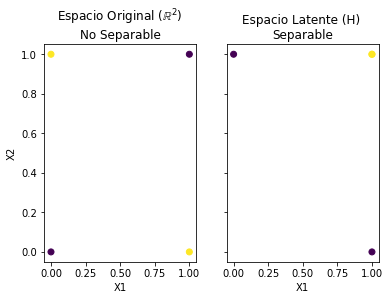

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].scatter(X[:,0], X[:,1], c=Y)
axs[0].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].scatter(H[:,0], H[:,1], c=Y)
axs[1].set_title('Espacio Latente (H) \nSeparable')

# Coloca X y Y labels comunes
for ax in axs.flat:
    ax.set(xlabel='X1', ylabel='X2')

# Esconde las X labels y los ticks para los plots de arriba y los ticks en Y para los que están a la derecha
for ax in axs.flat:
    ax.label_outer()

Se puede observar como en su representación en el espacio latente "H", las coordenadas de los puntos originales X se re-mapean hacia un espacio dimensional donde los valores iguales a 1 (amarillo) son linealmente separables de los valores iguales a 0 (morados). En conclusión, el modelo aprendió una representación dimensional intermedia "H", capaz de separar los puntos que previamente no eran separables. En la última capa, la red neuronal únicamente crea un separador lineal para dividir en dos al espacio latente y así conseguir realizar la clasificación que se buscaría alcanzar con una compuerta lógica XOR.